In [8]:
#create dataset
path = 'Data Files/EBSD Raw Data'
dataset=[]
#open all files
for filename in glob.glob(os.path.join(path, '*.txt')):
    with open(filename, 'r') as f:
        #remove comments
        for line in f:
            if '#' not in line:
                break
        
        #load to np array and add to dataset
        data=np.loadtxt(filename, usecols=(0,1,2,3,4,8,9))
        dataset.append(data)

In [39]:
%run Grain_Misorient_Functions.ipynb
#import functions
raw_data=dataset[0]
coords=raw_data[:,3:5] 
grain_IDs=raw_data[:,5]
grain_IDs_and_edges=raw_data[:,5:7]
coords_and_grains=raw_data[:,3:6]
coords_and_grains_copy=np.copy(coords_and_grains)
edge_grains=grain_IDs_and_edges[np.where(grain_IDs_and_edges[:,1]==1)]

In [64]:

p=grain_misorients(raw_data,return_p=True)

C:\Users\GREEN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in arccos
C:\Users\GREEN\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


In [65]:
print(p)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan  0.]


C:\Users\GREEN\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


nan

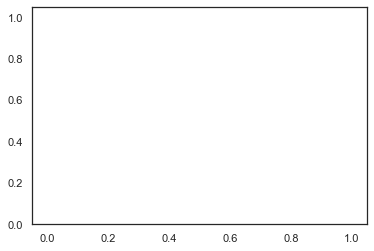

In [63]:
%run Grain_Misorient_Functions.ipynb
sample(100,'random')

In [ ]:
#import functions
%run Grain_Misorient_Functions.ipynb
%run Grain_Area_Functions.ipynb

#how big is each file before pieces are removed?
#do we average files processed differently?
file_size=100000

# def misorient_JS_graphs():

#number of trials to avg
num_trials=len(dataset)

#number of points to sample
sizes=np.arange(100,26000,1000)

#six different sampling methods (random, square, hex, sobol, gold, window)
results=np.zeros((len(sizes),6))

#for each file
for x in dataset:
    #slice raw data
    raw_data=x
    coords=raw_data[:,3:5] 
    grain_IDs=raw_data[:,5]
    grain_IDs_and_edges=raw_data[:,5:7]
    coords_and_grains=raw_data[:,3:6]
    coords_and_grains_copy=np.copy(coords_and_grains)
    edge_grains=grain_IDs_and_edges[np.where(grain_IDs_and_edges[:,1]==1)]
    
    #window slices
    window_slice_list=window_slices()

    #define p
    grain_misorient_p=grain_misorients(raw_data)

    #assume constant number of points sampled (and some discarded)
    percents=(sizes/file_size)*100

    #divergence for each method    
    random_div=np.zeros(len(percents))
    square_div=np.zeros(len(percents))
    hex_div=np.zeros(len(percents))
    sobol_div=np.zeros(len(percents))
    gold_div=np.zeros(len(percents))
    window_div=np.zeros(len(percents))

    index=0
    for x in percents:
        random_div[index]=sample(sizes[index],'random')
        square_div[index]=sample(sizes[index],'square')
        hex_div[index]=sample(sizes[index],'hex')
        sobol_div[index]=sample(sizes[index],'sobol')
        gold_div[index]=sample(sizes[index],'gold')
        window_div[index]=sample(sizes[index],'window')
        index+=1

    #add to array
    results[:,0]+=random_div
    results[:,1]+=square_div
    results[:,2]+=hex_div
    results[:,3]+=sobol_div
    results[:,4]+=gold_div
    results[:,5]+=window_div


#average results        
results=results/num_trials

#slice results
avg_random_div=results[:,0]
avg_hex_div=results[:,1]
avg_square_div=results[:,2]
avg_sobol_div=results[:,3]
avg_gold_div=results[:,4]
avg_window_div=results[:,5]

In [1]:
#plot JS results
plt.xlim(0,25)
plt.ylim(0,1)
plt.title('Grain Areas')
plt.xlabel('Percent')
plt.ylabel('JS Divergence')
sns.lineplot(percents,avg_random_div,color='blue',label='Random')
sns.lineplot(percents,avg_square_div,color='red',label='Square Grid')
sns.lineplot(percents,avg_hex_div,color='green',label='Hexagonal Grid')
sns.lineplot(percents,avg_sobol_div,color='purple',label='Sobol 2D')
sns.lineplot(percents,avg_gold_div,color='gold',label='Golden 2D')
sns.lineplot(percents,avg_window_div,color='black',label='Window')

NameError: name 'plt' is not defined